In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
df['target']=iris.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
df1=df[50:]
df0=df[:50]
df2=df[100:]

In [44]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'sepal width (cm)')

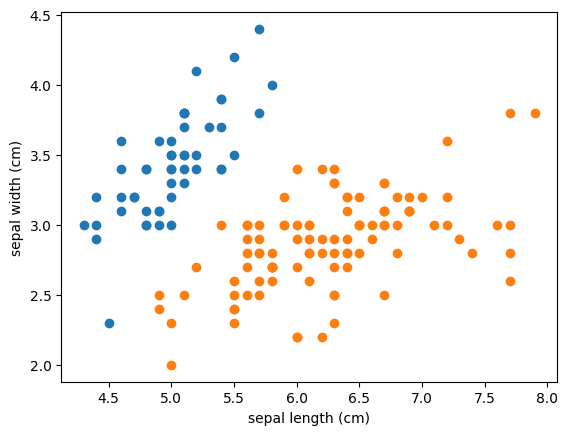

In [45]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [48]:
X=df.drop(['target'],axis='columns')
y=df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [50]:
len(X_train)

120

In [51]:
len(X_test)

30

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)


In [65]:
knn.fit(X_train,y_train)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [66]:
knn.score(X_test,y_test)

1.0

In [75]:
knn.score(X_train,y_train)

0.9666666666666667

In [74]:
knn.predict([[6.8,3.4,5.7,0.2]])

/home/bruno-sharrix/my-jupyter.env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [78]:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)

cm=confusion_matrix(y_test,y_predicted)
cm


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(95.72222222222221, 0.5, 'Truth')

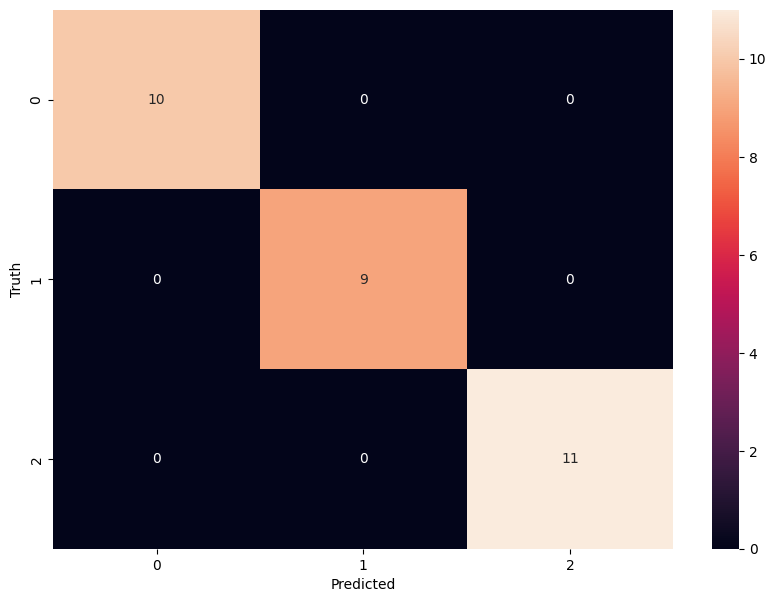

In [80]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

